In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\Project-Housing--2-\Project-Housing_splitted\train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# EDA

In [4]:
df.shape

(1168, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# sales price is target variable

In [7]:
df['SalePrice'].unique()

array([128000, 268000, 269790, 190000, 215000, 219210, 121500, 155000,
       140000, 118500, 119500, 237000, 201000, 126500, 135500, 165000,
       120500, 194500, 148000, 106000, 231500, 133000, 142125, 136500,
       146000, 217000, 112000, 394432, 113000, 188700, 319900, 135000,
       128500, 169000, 122000, 152000, 243000, 156000,  79500, 132000,
       144152, 130000, 149900, 124500, 179000, 147000,  39300, 312500,
       256000,  60000, 153000,  84900, 230000, 180000, 106500, 239000,
       107500, 123000, 176000, 228500, 117500, 350000, 200624, 173000,
       225000,  84500, 174900,  79000, 297000,  87000, 465000, 204900,
       127000, 159000, 170000, 159500, 102000, 109500, 163990, 189950,
       119000, 157500, 287000, 144000, 286000, 172000, 212000, 124000,
       150000, 205950, 251000, 129000, 223500, 475000, 335000, 115000,
       205000, 209500, 176432, 171000, 302000, 259500, 141000, 187500,
       385000, 275000, 108000,  89500, 109900, 185000, 143000, 127500,
      

In [8]:
# it is regression problem used ml algorthims

In [9]:
# data visulazation

In [10]:
catg_features = df.select_dtypes('object')

In [11]:
numerical_features = df.select_dtypes('number')

In [12]:
catg_features.shape

(1168, 43)

In [13]:
numerical_features.shape

(1168, 38)

In [14]:
numerical_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


In [15]:
numerical_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

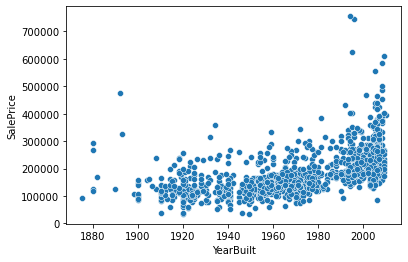

In [16]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=df)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

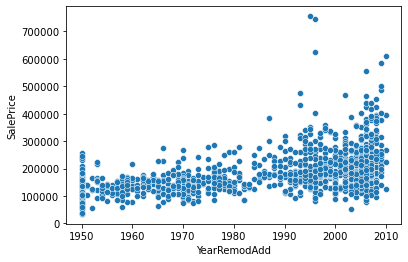

In [17]:
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=df)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

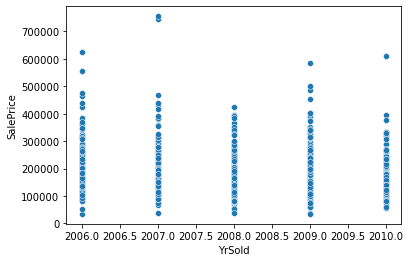

In [18]:
sns.scatterplot(x='YrSold',y='SalePrice',data=df)

In [19]:
#categorical variables

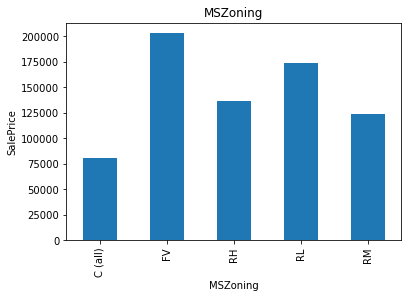

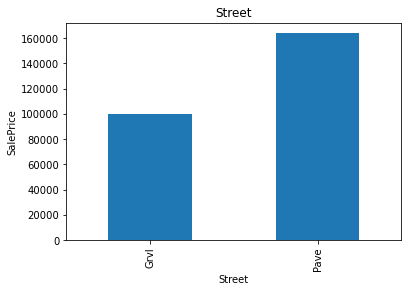

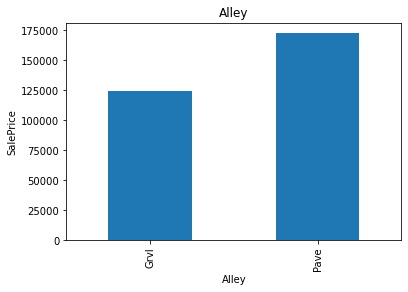

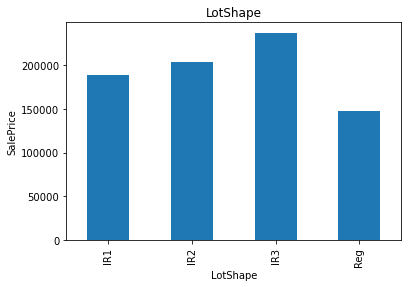

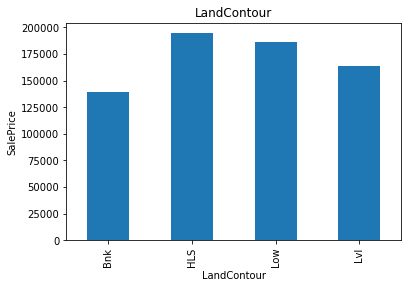

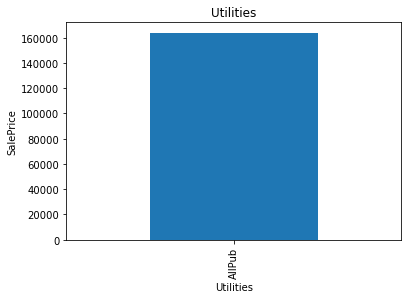

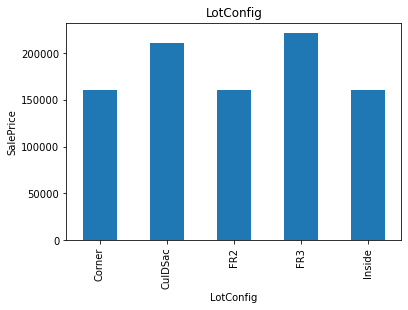

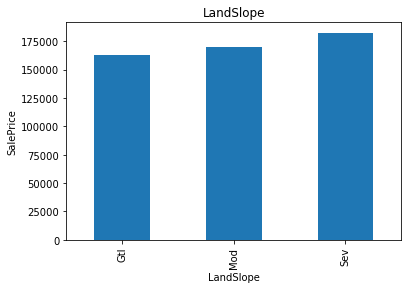

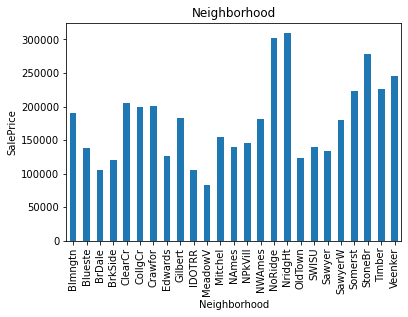

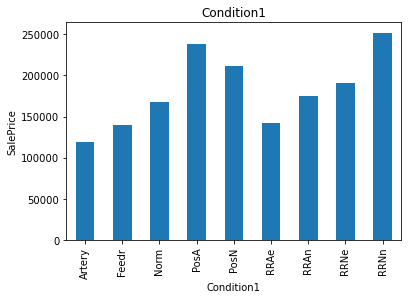

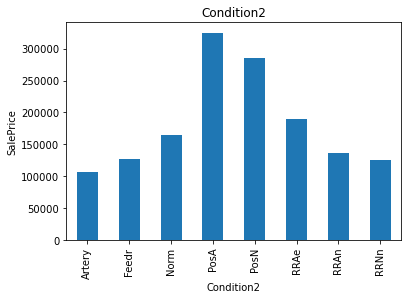

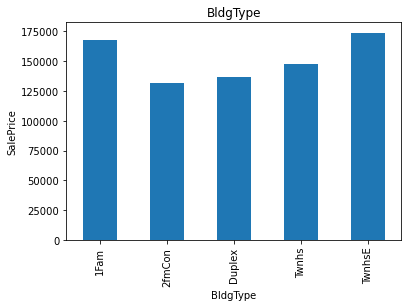

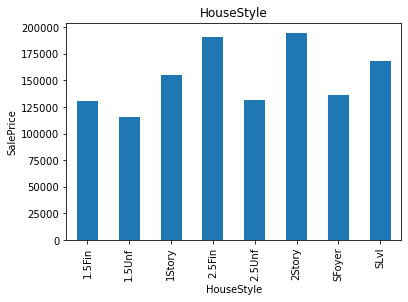

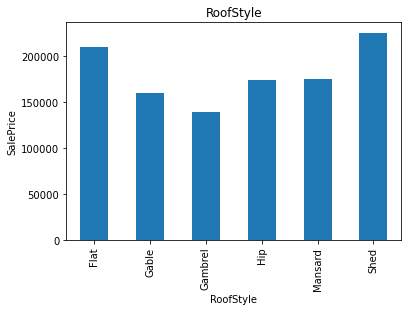

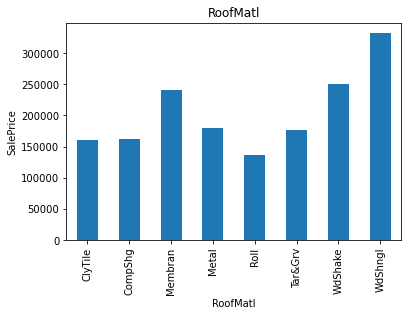

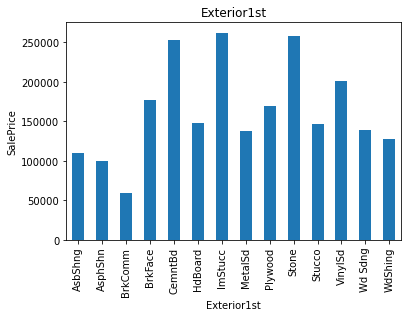

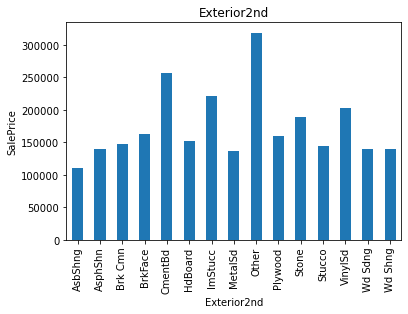

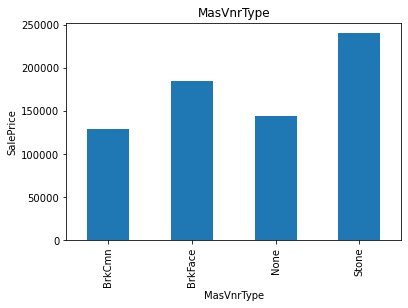

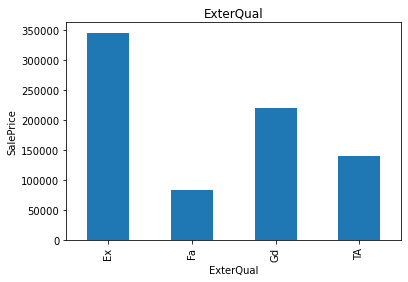

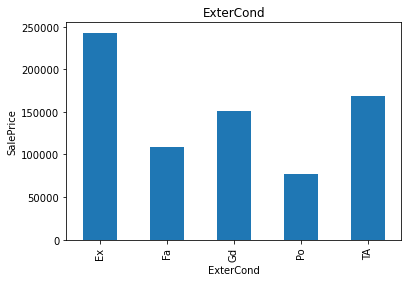

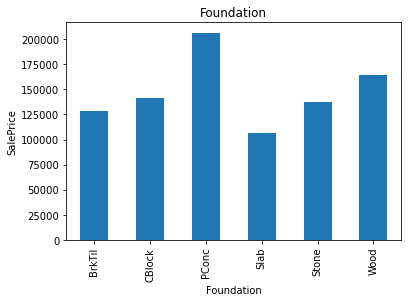

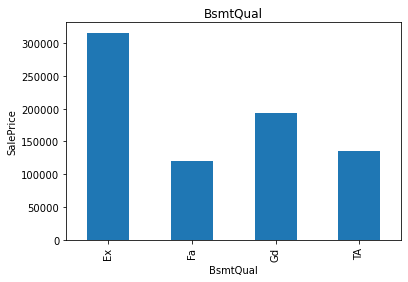

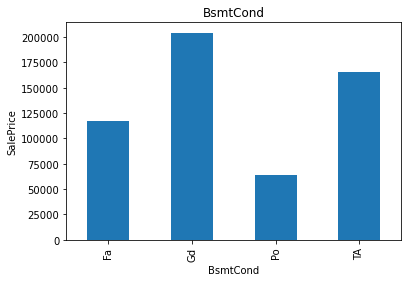

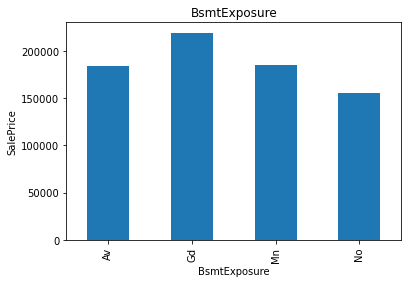

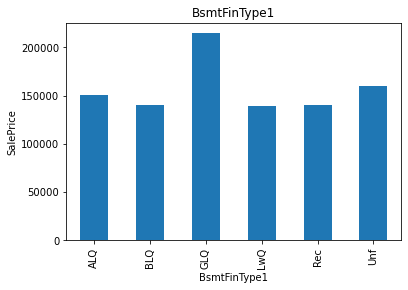

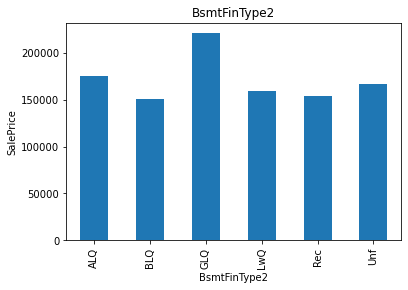

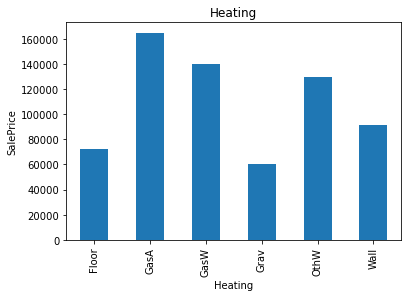

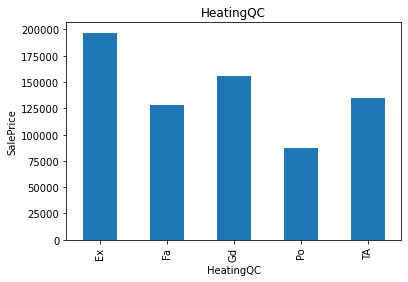

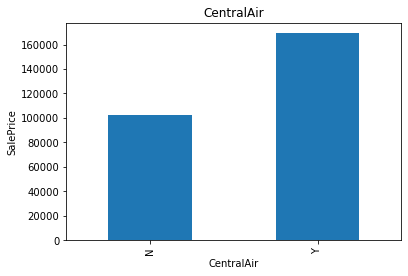

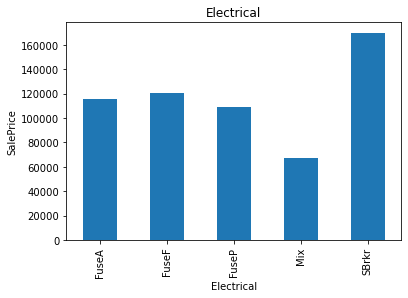

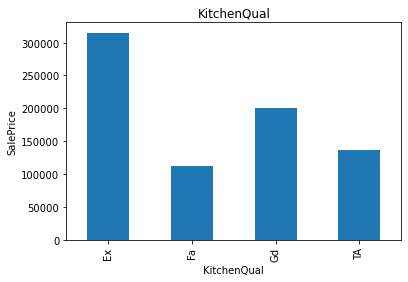

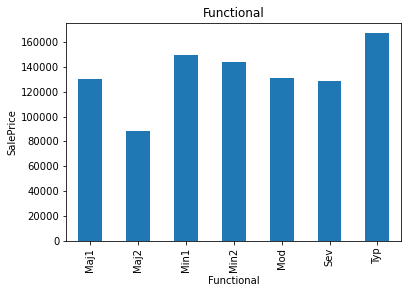

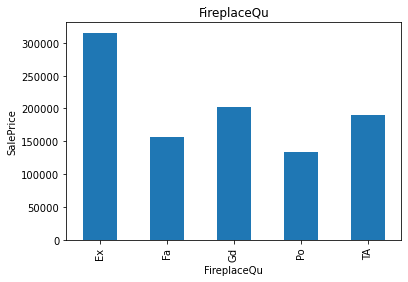

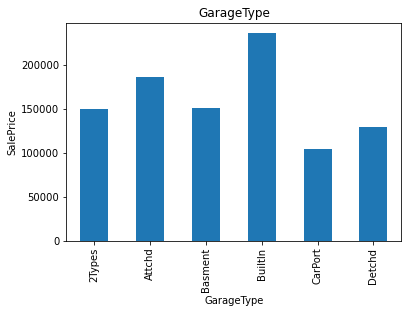

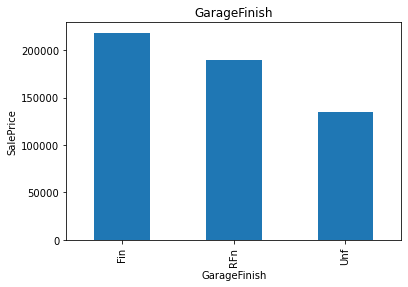

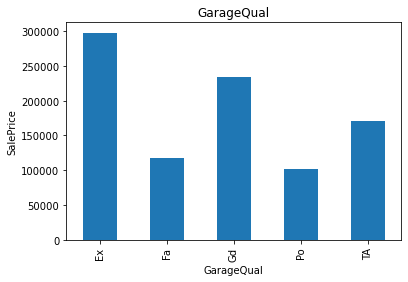

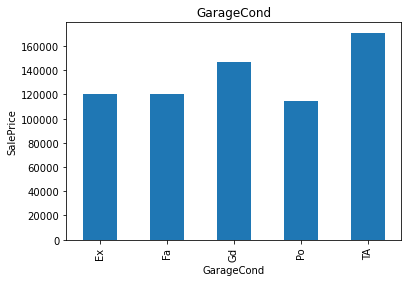

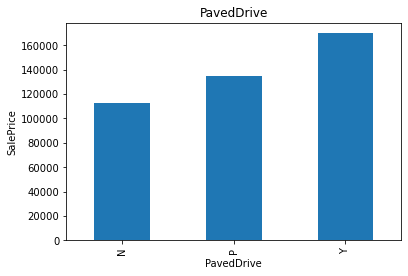

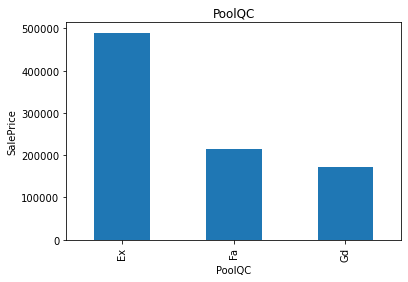

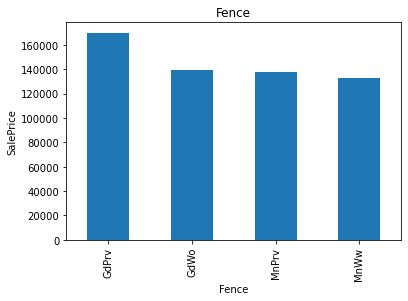

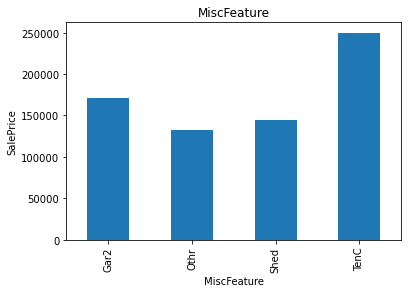

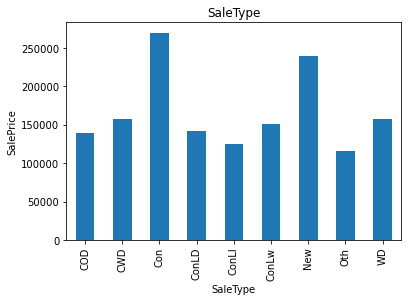

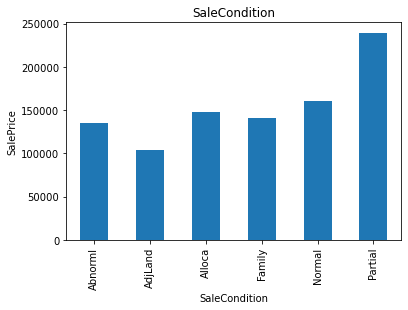

In [20]:
for feature in catg_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
    
    
    
    

In [21]:
year_feauture = [feature for feature in numerical_features if 'yr' in feature or 'year' in feature]

year_feauture

[]

Text(0.5, 1.0, 'House Price vs YearSold')

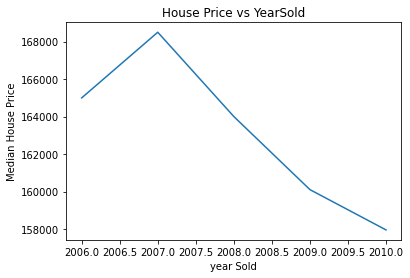

In [22]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')


In [23]:
#numerical variables plot

In [24]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feauture+['ld']]

In [25]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

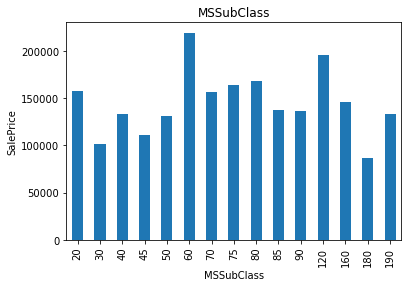

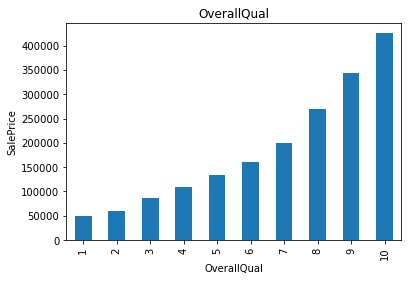

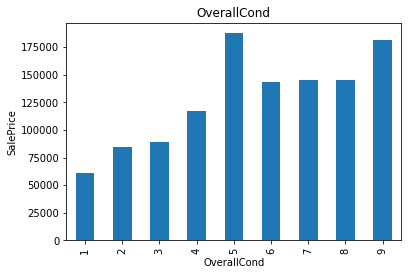

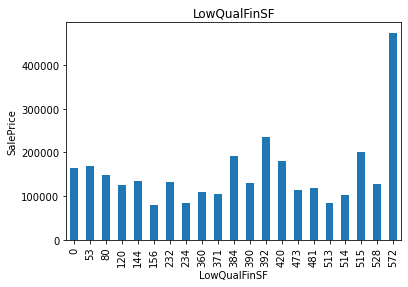

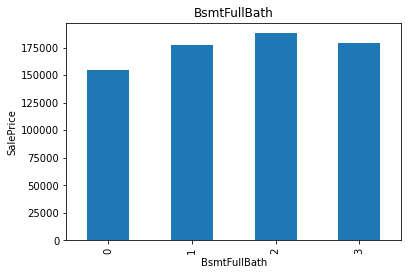

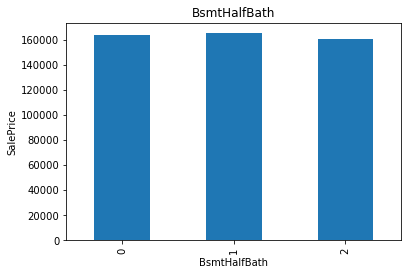

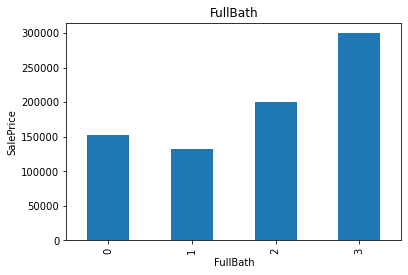

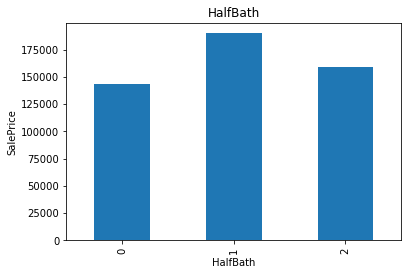

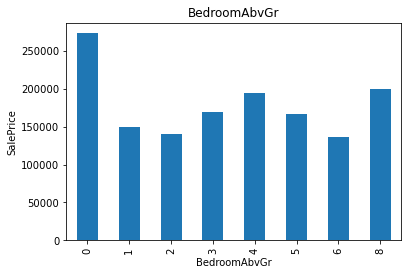

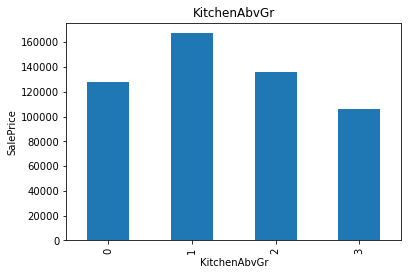

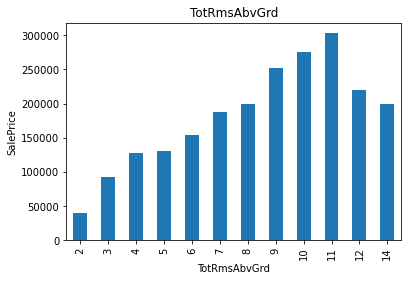

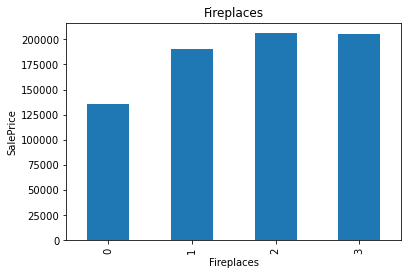

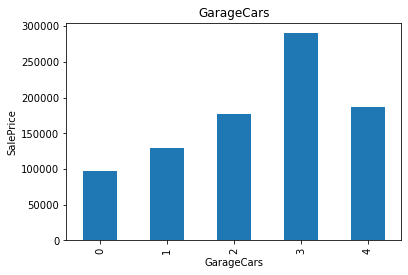

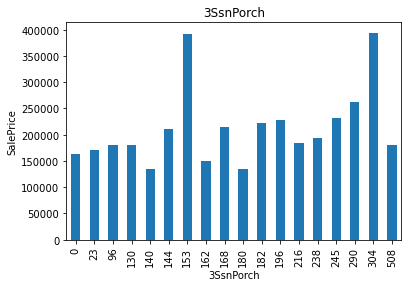

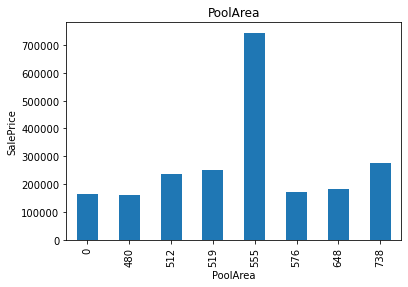

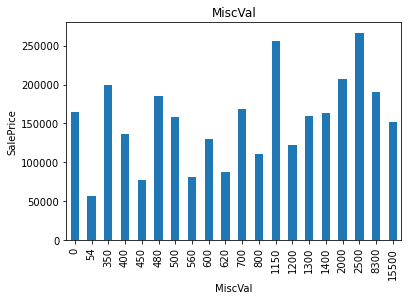

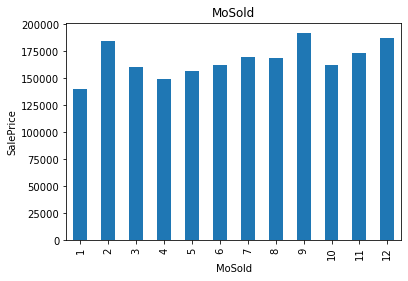

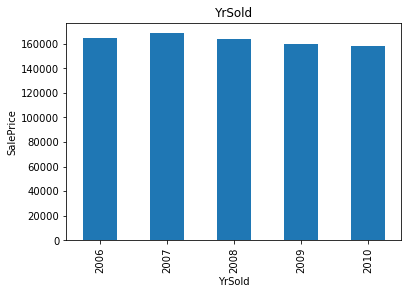

In [26]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [27]:
continious_feature =[feature for feature in numerical_features if feature not in discrete_feature+year_feauture+['ld']]

In [28]:
continious_feature

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

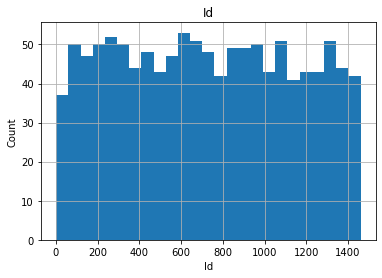

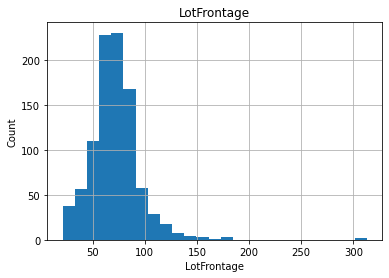

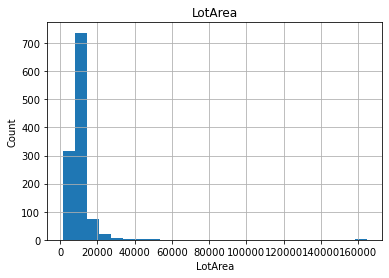

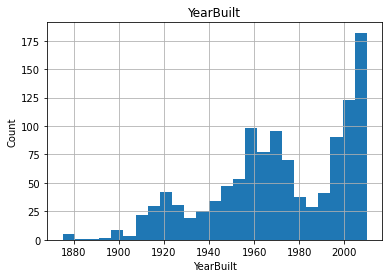

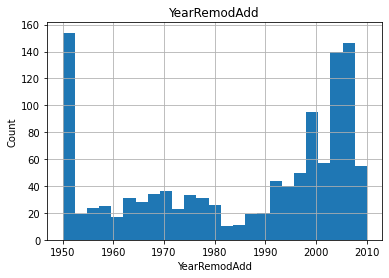

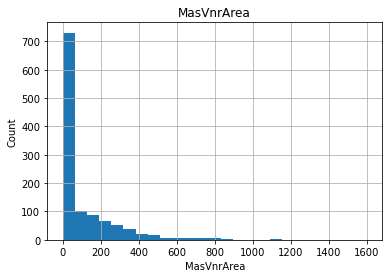

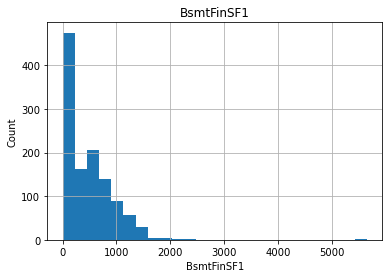

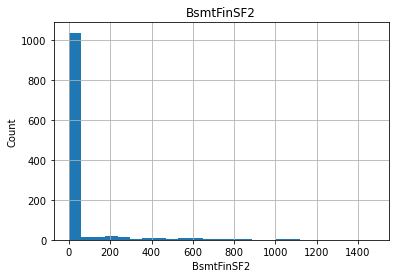

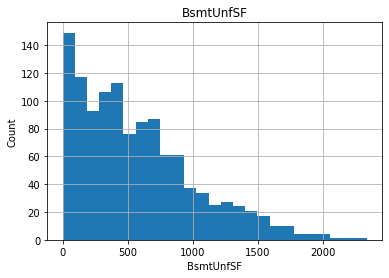

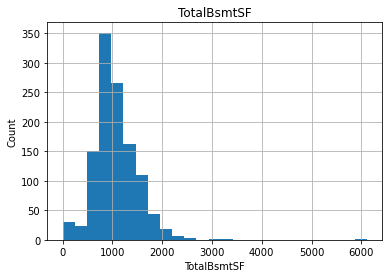

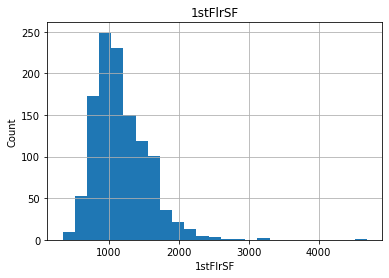

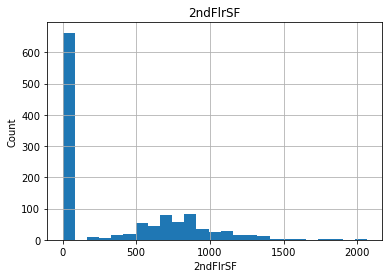

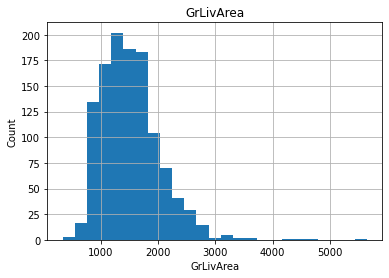

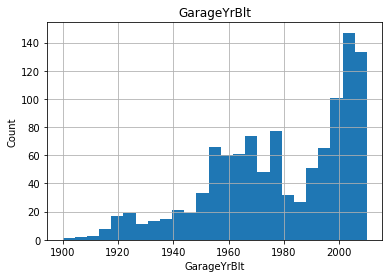

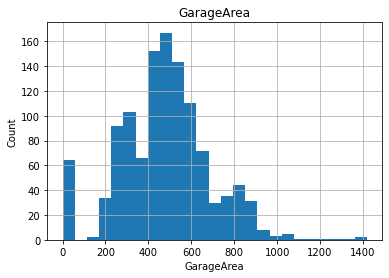

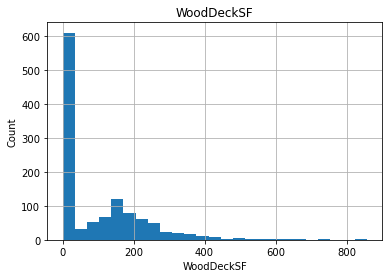

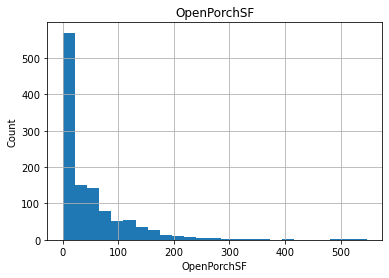

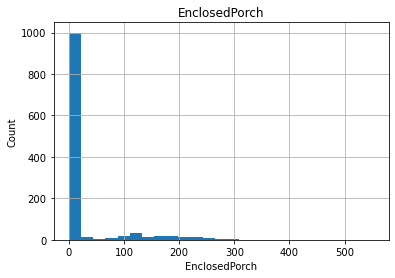

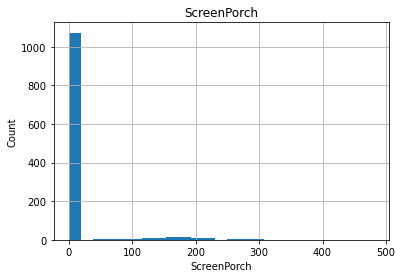

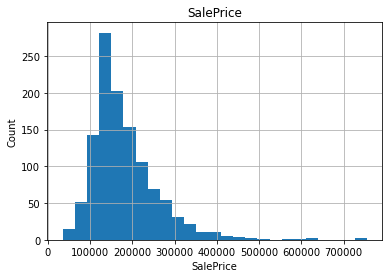

In [29]:
for feature in continious_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [30]:
# data cleaning

In [31]:
# null values 

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [34]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [35]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [36]:
df['Alley'].fillna(df['Alley'].mode()[0],inplace=True)

In [37]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [38]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [39]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [40]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)

In [41]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)

In [42]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)

In [43]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)

In [44]:
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [45]:
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [46]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

In [47]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [48]:
df['PoolQC'].fillna(df['PoolQC'].mode()[0],inplace=True)

In [49]:
df['Fence'].fillna(df['Fence'].mode()[0],inplace=True)

In [50]:
df['MiscFeature'].fillna(df['MiscFeature'].mode()[0],inplace=True)

In [51]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [52]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [53]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [54]:
# treat null values

In [55]:
#outliers

In [56]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


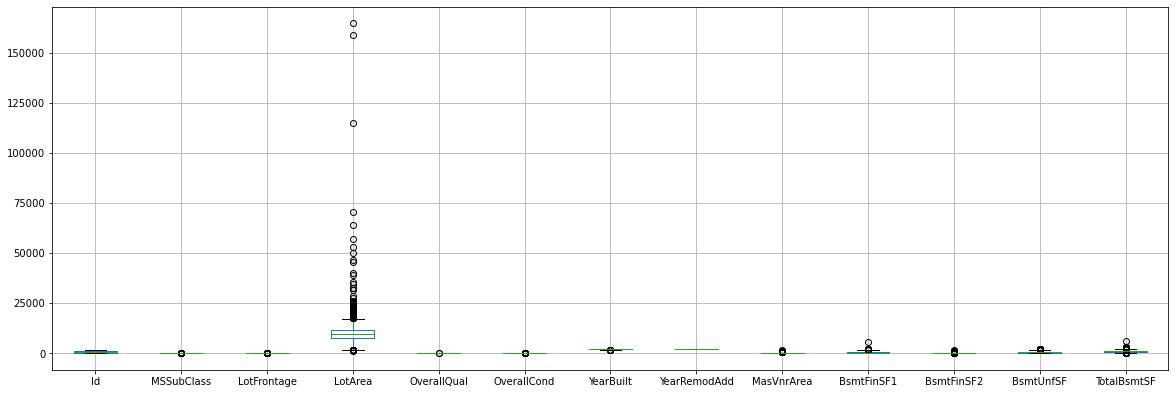

In [57]:
df.iloc[:,0:40].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [58]:
columns = df.columns

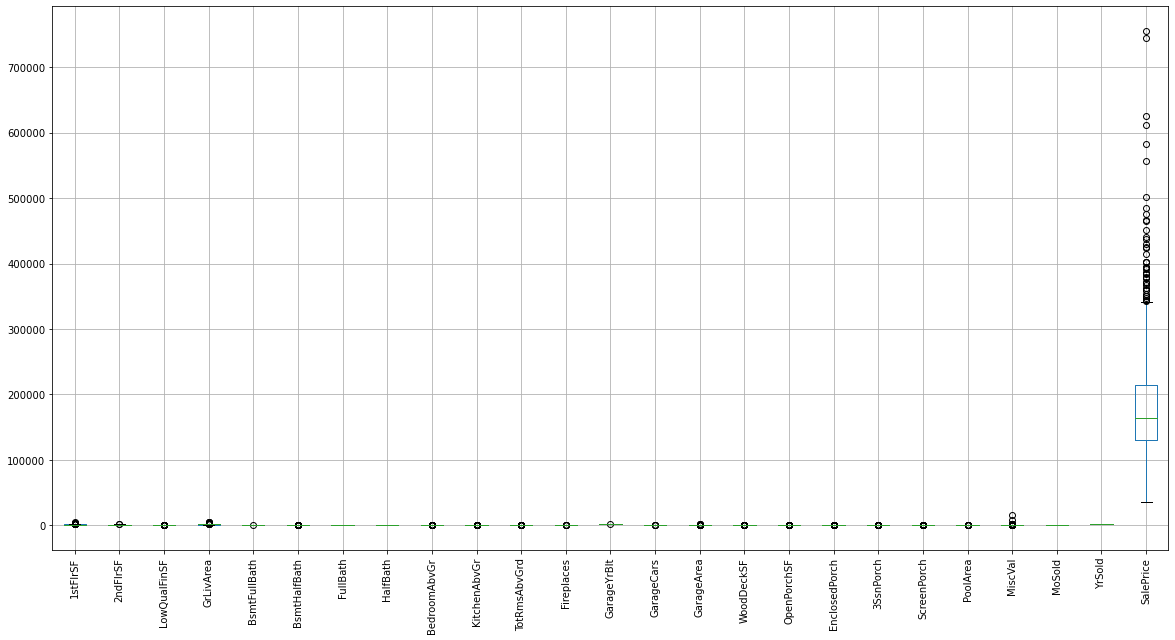

In [59]:
x = df.iloc[:,41:81].boxplot(figsize=[20,10])
# plt.setp(ax.get_xticklabels(), rotation = 45)
# plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation='vertical')
# plt.xtick_labels(rotation='vertical')
plt.show()

In [60]:
# so some outliers are there so removed outliers

In [61]:
dfCountCols = df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',]]

In [62]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

In [63]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])


shape before and after
shape before         : (1168, 81)
shape after          : (808, 81)
Percentage Loss      : 0.3082191780821918


In [64]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
dfCountCols = df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',]]

In [66]:
Q1 = dfCountCols.quantile(0.25)
Q3 = dfCountCols.quantile(0.75)
IQR = Q3 - Q1
df_new1 = df[~((dfCountCols < (Q1 - 1.5 * IQR)) |(dfCountCols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [67]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new1.shape[0])/df.shape[0])


shape before and after
shape before         : (1168, 81)
shape after          : (458, 81)
Percentage Loss      : 0.6078767123287672


In [68]:
#remove outliers

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [71]:
x = df.drop(columns='SalePrice',axis=1)
y = df['SalePrice']

In [72]:
x.skew()

Id                0.000000
MSSubClass        0.657253
MSZoning         -1.796785
LotFrontage       0.471005
LotArea           0.159219
Street          -17.021969
Alley             5.436187
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.448970
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        1.355502
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        0.539784
BsmtFinType2     -3.615783
BsmtFinSF2        3.504848
B

In [73]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [74]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [75]:
df_new.skew()

Id               -0.288778
MSSubClass       -0.080627
MSZoning          0.233113
LotFrontage       0.041583
LotArea          -0.237287
Street          -17.021969
Alley             5.436187
LotShape         -0.594207
LandContour      -2.592303
Utilities         0.000000
LotConfig        -1.030401
LandSlope         3.954345
Neighborhood     -0.146541
Condition1        0.225468
Condition2        0.537277
BldgType          1.857194
HouseStyle       -0.080331
OverallQual       0.031843
OverallCond       0.086087
YearBuilt        -0.306003
YearRemodAdd     -0.626352
RoofStyle        -0.292233
RoofMatl         -6.314987
Exterior1st      -0.338023
Exterior2nd      -0.352793
MasVnrType       -0.016203
MasVnrArea        0.458705
ExterQual        -0.605112
ExterCond        -2.270791
Foundation        0.004296
BsmtQual         -0.413999
BsmtCond         -3.025865
BsmtExposure     -0.914214
BsmtFinType1     -0.206639
BsmtFinSF1       -0.318082
BsmtFinType2     -2.420885
BsmtFinSF2        2.396624
B

In [76]:
# remove skewness 

In [77]:
# so data cleaning complete

In [78]:
# check corelation between variables

In [79]:
corr_mat = df.corr()
corr_mat

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.010555,0.008739,-0.025424,-0.003123,0.003303,-0.008433,0.022605,-0.020308,NaN,...,0.065065,-0.013358,-0.003411,0.005355,0.016537,0.024028,-0.009118,0.024640,-0.015146,-0.034556
MSSubClass,0.010555,1.000000,0.013516,-0.324512,-0.289010,-0.029520,0.175991,0.076645,-0.021033,NaN,...,0.019977,-0.008965,0.032148,-0.000751,-0.030254,0.005488,-0.039245,0.045454,-0.033527,-0.015062
MSZoning,0.008739,0.013516,1.000000,-0.079477,-0.050498,0.140215,-0.371755,0.053655,0.001175,NaN,...,-0.001502,0.001204,-0.035770,0.000802,0.011956,-0.051646,-0.004964,0.079854,0.004501,-0.198318
LotFrontage,-0.025424,-0.324512,-0.079477,1.000000,0.568491,-0.041553,-0.211565,-0.151221,-0.020016,NaN,...,0.071873,-0.131323,-0.062704,0.010183,-0.003554,0.027468,-0.004527,-0.042208,0.072508,0.349837
LotArea,-0.003123,-0.289010,-0.050498,0.568491,1.000000,-0.059142,-0.170883,-0.305133,-0.017495,NaN,...,0.076404,-0.080221,-0.048129,-0.047259,0.075370,0.012867,-0.041749,-0.033343,0.057748,0.449715
Street,0.003303,-0.029520,0.140215,-0.041553,-0.059142,1.000000,0.010454,-0.012941,0.105226,NaN,...,0.004069,-0.003260,-0.015249,-0.002171,-0.134283,-0.008860,-0.019635,0.025920,0.014176,0.049819
Alley,-0.008433,0.175991,-0.371755,-0.211565,-0.170883,0.010454,1.000000,0.046387,-0.040922,NaN,...,-0.012378,0.009916,-0.007750,0.006605,-0.029143,-0.050530,-0.007352,-0.002348,-0.043124,-0.005060
LotShape,0.022605,0.076645,0.053655,-0.151221,-0.305133,-0.012941,0.046387,1.000000,0.081803,NaN,...,-0.023309,0.017266,-0.021965,0.031178,-0.021309,-0.050418,0.021421,-0.015161,-0.054905,-0.287903
LandContour,-0.020308,-0.021033,0.001175,-0.020016,-0.017495,0.105226,-0.040922,0.081803,1.000000,NaN,...,0.011627,-0.017708,-0.030107,-0.011795,0.024414,-0.023872,0.009499,-0.041763,0.047715,0.032355
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
corr_mat = df.corr()
corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817104
GrLivArea        0.735553
GarageCars       0.669420
GarageArea       0.658957
TotalBsmtSF      0.621147
FullBath         0.614222
YearBuilt        0.611207
1stFlrSF         0.584956
YearRemodAdd     0.583555
TotRmsAbvGrd     0.522691
GarageYrBlt      0.521532
Fireplaces       0.489372
LotArea          0.449715
Foundation       0.424412
MasVnrArea       0.421285
OpenPorchSF      0.406815
2ndFlrSF         0.404256
LotFrontage      0.349837
BsmtFinSF1       0.332347
WoodDeckSF       0.329477
HalfBath         0.325391
CentralAir       0.291834
Electrical       0.277493
PavedDrive       0.270185
HouseStyle       0.250300
SaleCondition    0.245379
BsmtFullBath     0.220856
BsmtUnfSF        0.185762
BedroomAbvGr     0.179225
Neighborhood     0.177082
GarageCond       0.162255
FireplaceQu      0.159859
RoofStyle        0.145666
Exterior2nd      0.141950
Exterior1st      0.139273
Condition1       0.137417
ExterCond        0.136273
Functional  

In [81]:
# feauthre selection

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

In [83]:
x = df.drop(columns='SalePrice',axis=1)
y = df['SalePrice']

In [84]:
best_features = SelectKBest(score_func= f_classif, k=30)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

In [85]:
feature_scores = pd. concat([df_columns,df_scores],axis=1)
feature_scores.columns =  ['Feature_Name', 'Score']
print(feature_scores.nlargest(30,'Score'))

    Feature_Name     Score
17   OverallQual  5.303071
27     ExterQual  3.514221
30      BsmtQual  2.876879
46     GrLivArea  2.830014
53   KitchenQual  2.617125
61    GarageCars  2.578547
62    GarageArea  2.447952
49      FullBath  2.435854
19     YearBuilt  2.197209
60  GarageFinish  2.187163
38   TotalBsmtSF  2.162140
43      1stFlrSF  1.971984
5         Street  1.835751
20  YearRemodAdd  1.813783
59   GarageYrBlt  1.766076
39       Heating  1.707885
26    MasVnrArea  1.701313
44      2ndFlrSF  1.682752
34    BsmtFinSF1  1.670902
54  TotRmsAbvGrd  1.669482
4        LotArea  1.663340
2       MSZoning  1.640044
56    Fireplaces  1.591973
41    CentralAir  1.557680
29    Foundation  1.528516
67   OpenPorchSF  1.432607
7       LotShape  1.407526
71      PoolArea  1.374391
40     HeatingQC  1.358939
50      HalfBath  1.337597


In [86]:
# separate dependent variables and indepdent variables

In [87]:
x = df.drop(columns=['SalePrice'],axis=1)
y = df['SalePrice']

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [89]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state=83)

In [91]:
lr=LinearRegression()
kn=KNeighborsRegressor()
gb=GradientBoostingRegressor()
rf=RandomForestRegressor()


In [92]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.8818878383030356
35.38383839143746
2673.9082428445763
0.887955497768113


In [93]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())

r2 score 0.8064479239219302
50.41481481481481
4381.771396011396
0.7189658808722397


In [94]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('r2 score,',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(gb,x,y,cv=5).mean())


r2 score, 0.9008957721595104
33.55188486000106
2243.5929367148524
0.9030099042392046


In [95]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(rf,x,y,cv=5).mean())

r2 score 0.8807433084155838
37.235868945868944
2699.8189353276352
0.8828912544812839


In [96]:
# hyper parameter tuning

In [97]:
# gradient boosting select model

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
grid_param = {'learning_rate':[3.9,4.8,2.9,0.1],
              'n_estimators':[23,16,18,3,6,9,14],
              'min_samples_split':[6,5,8,9,21,2],
              'max_depth':[5,8,9,10,17,18,26,3]}

In [100]:
gridsearch = GridSearchCV(estimator=gb, param_grid=grid_param, cv=5, n_jobs=-1)

In [101]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [3.9, 4.8, 2.9, 0.1],
                         'max_depth': [5, 8, 9, 10, 17, 18, 26, 3],
                         'min_samples_split': [6, 5, 8, 9, 21, 2],
                         'n_estimators': [23, 16, 18, 3, 6, 9, 14]})

In [102]:
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 6,
 'n_estimators': 23}

In [104]:
Final_mod = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_split=6,n_estimators=23)
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(r2*100)

88.07433084155838


In [105]:
# save the model

In [106]:
import joblib
joblib.dump(Final_mod,'housing.pkl')

['housing.pkl']